**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
from seaborn import histplot
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

**Read Data Set**

In [2]:
df = pd.read_csv('/kaggle/input/heart-diseae/heart-disease.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [6]:
df.shape

(303, 14)

**Checking for missing values**

In [7]:
df.isnull().sum().sum

<bound method Series.sum of age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64>

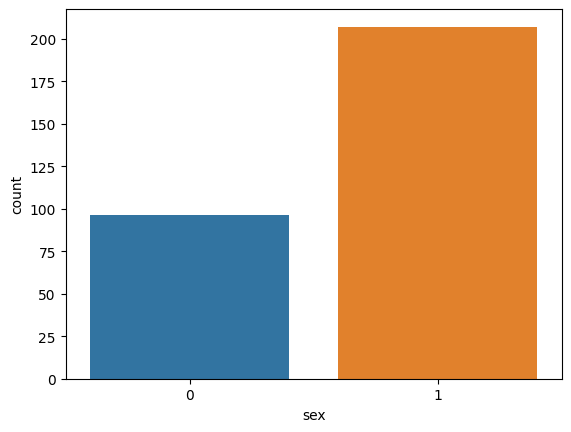

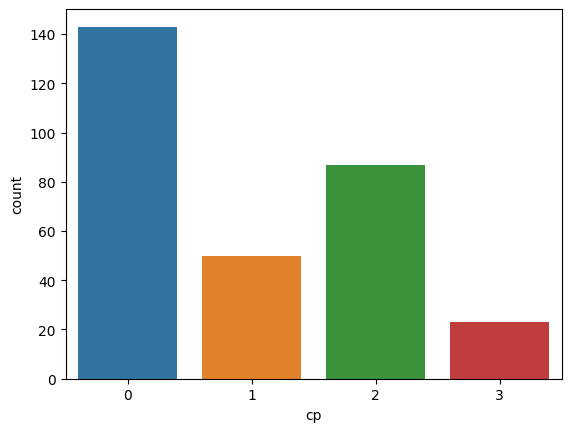

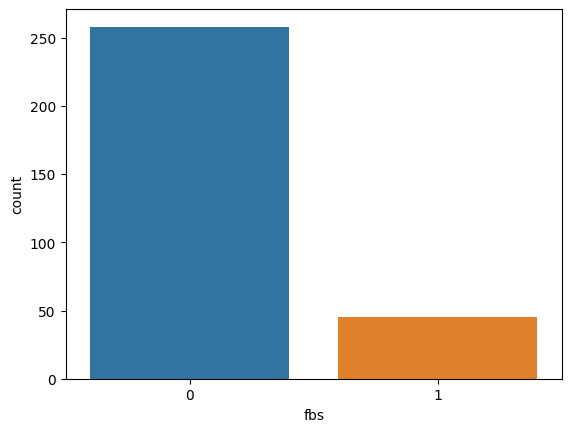

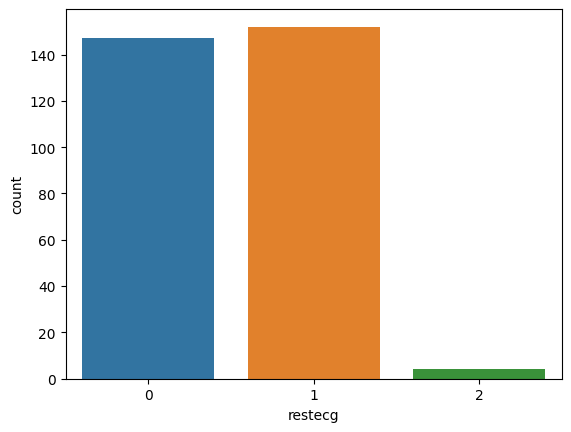

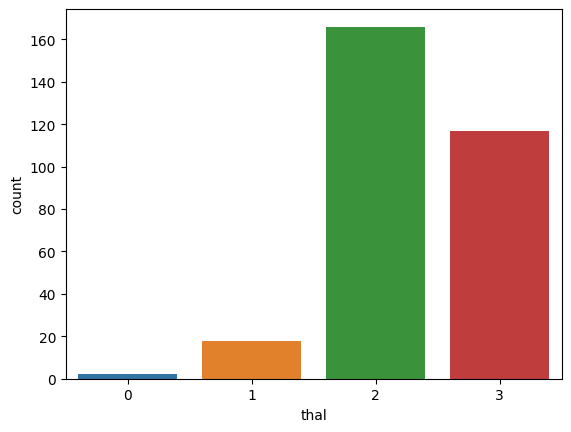

In [8]:
cols = ['sex','cp','fbs','restecg','thal']

for col in cols:
    sns.countplot(x=col,data=df)
    plt.show()

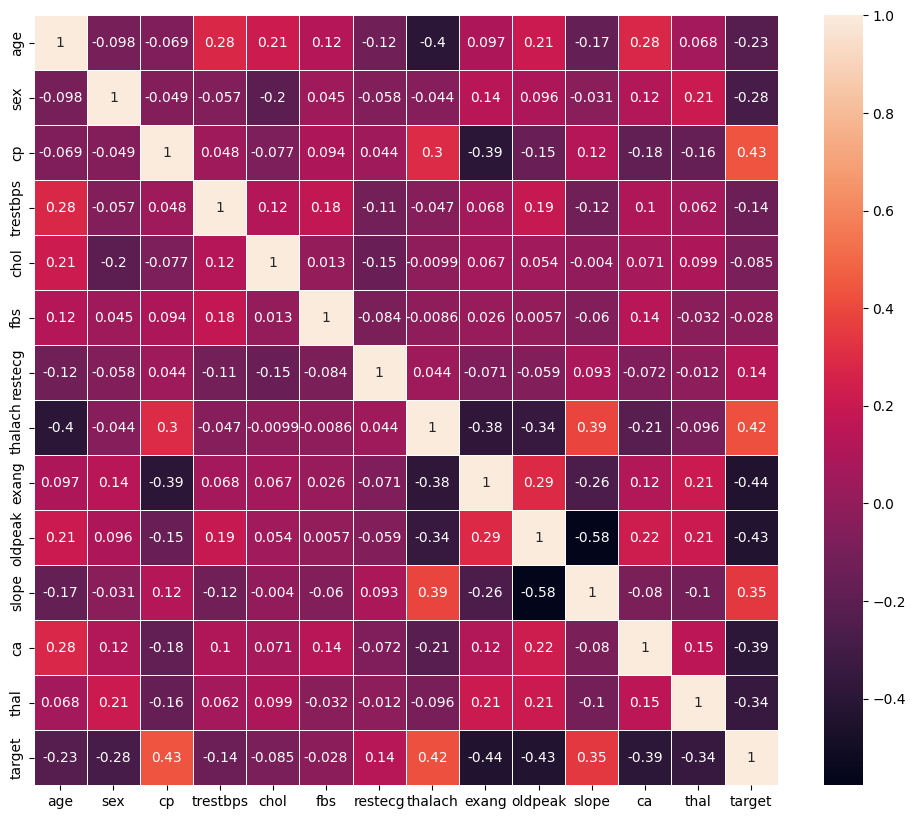

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)
plt.show()

In [10]:
X = df.drop('target',axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Applying tree based ML model:** 
1. Random Forest
2. Logistic Regression
3. XGBoost

Random Forest
F1 Score:  0.8615384615384615


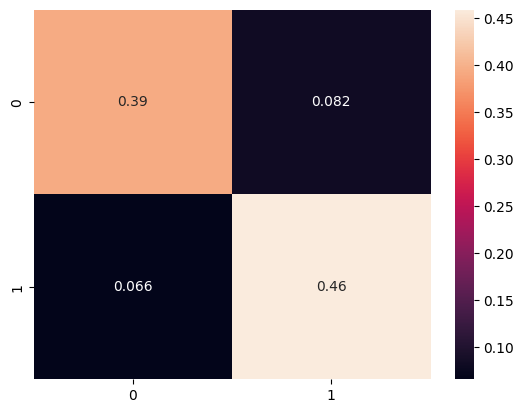

Logistic Regression
F1 Score:  0.8923076923076922


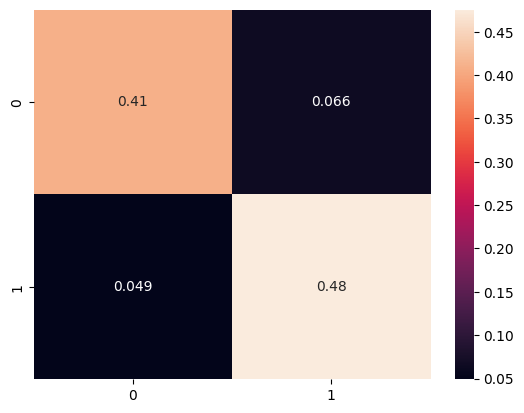

XGBoost
F1 Score:  0.8196721311475409


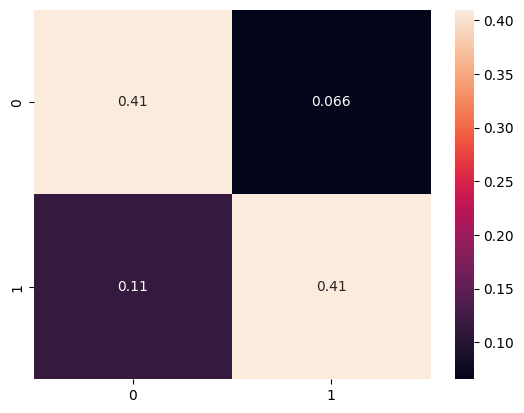

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

models= {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost' : XGBClassifier()
}

for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(Y_test,ypred))
    sns.heatmap(confusion_matrix(Y_test,ypred)/np.sum(confusion_matrix(Y_test,ypred)),annot=True)
    plt.show()